Q:\20230612_D102_Myh67_d80\DNA\zarr_mosaic_printoutQ:\20230612_D102_Myh67_d80\DNA\H10_R28_29_30_col0.png


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [01:50<00:00,  3.97it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'Q:\\20230612_D102_Myh67_d80\\DNA\\zarr_mosaic_printoutQ:\\20230612_D102_Myh67_d80\\DNA\\H10_R28_29_30_col0.png'

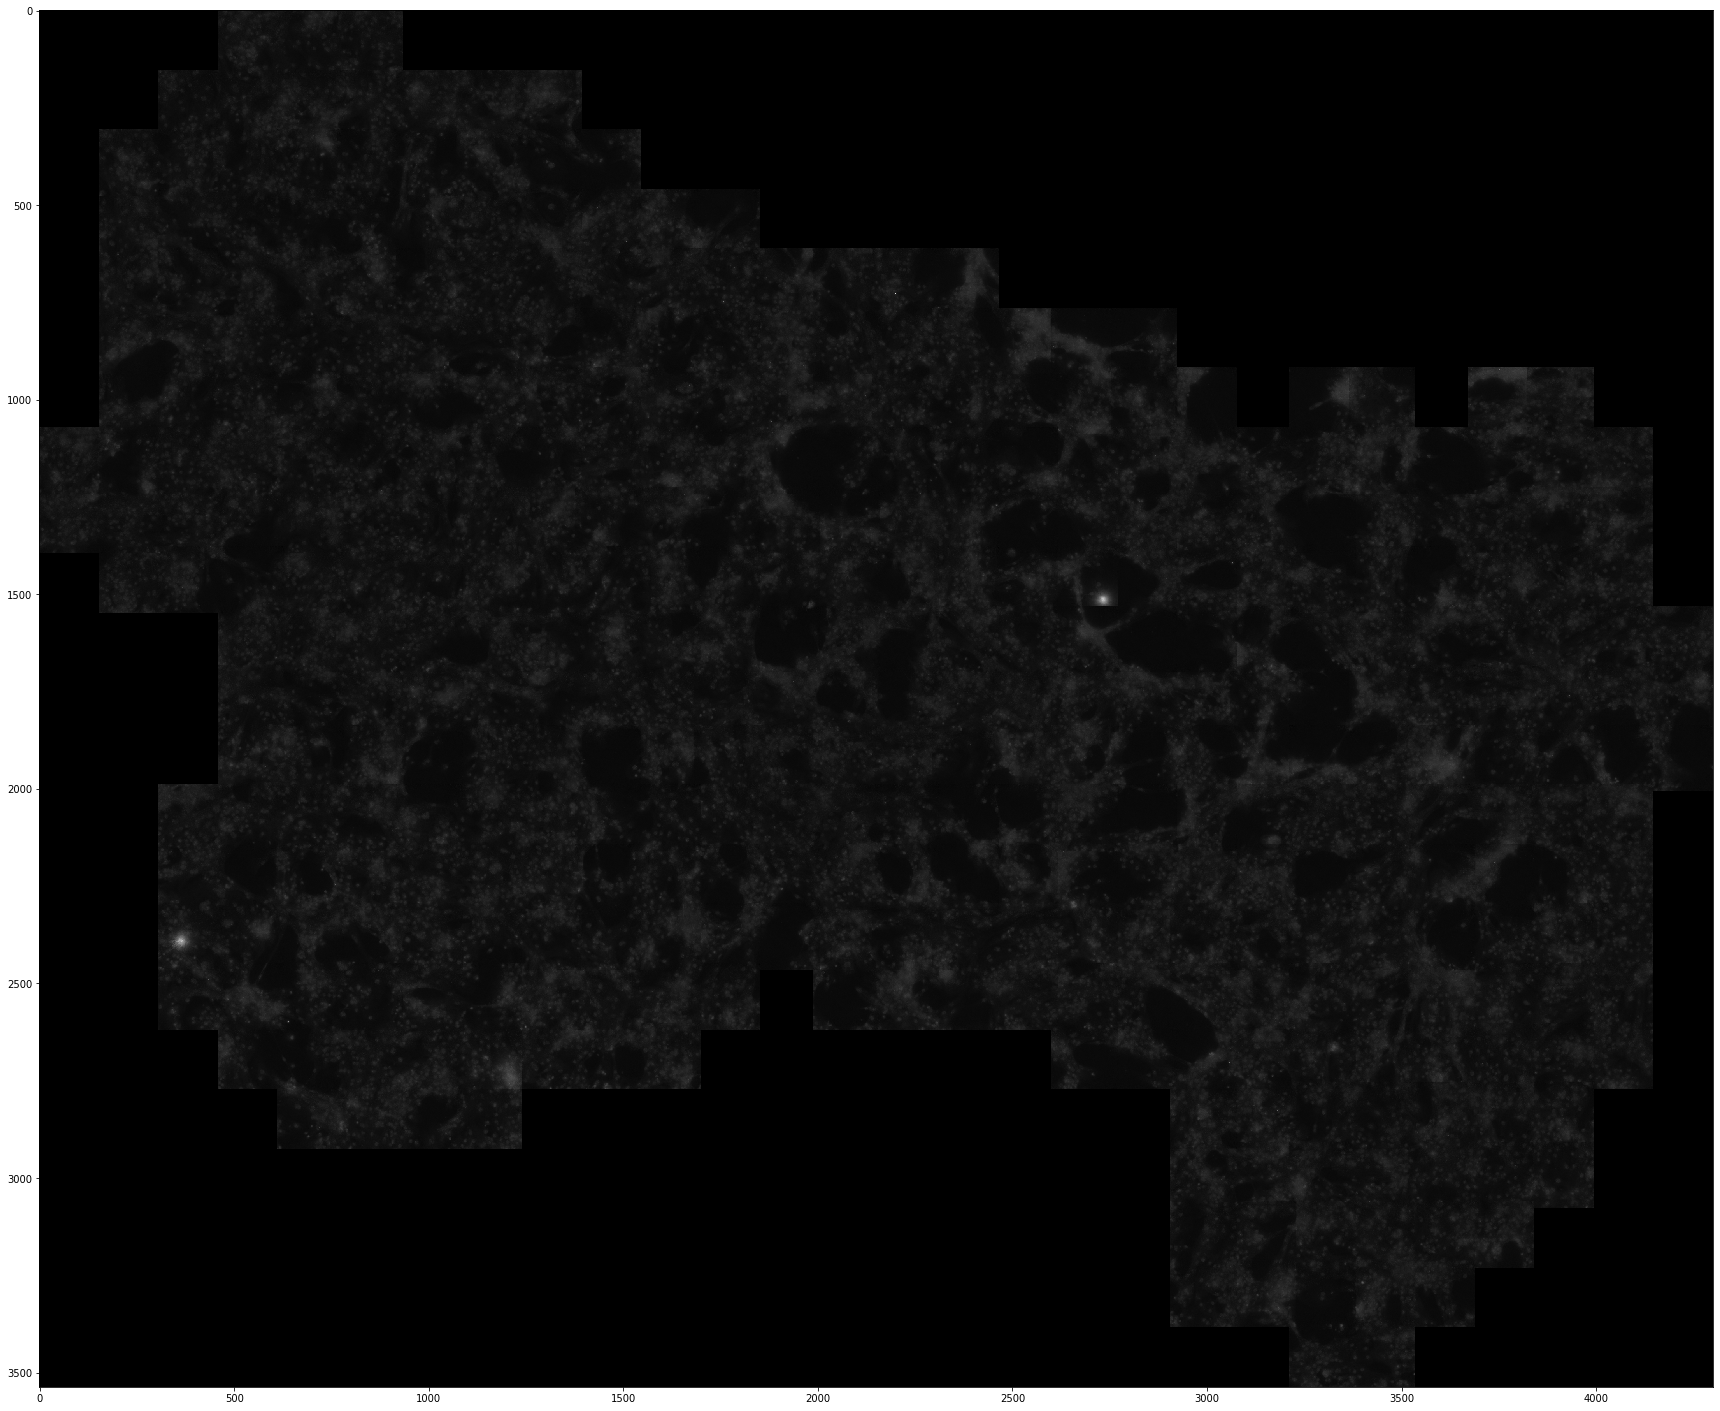

In [15]:
import time
import numpy as np,os,sys,glob
import matplotlib.pylab as plt
from ioMicro import *
from tqdm import tqdm
data_flds = glob.glob(r'Q:\20230612_D102_Myh67_d80\DNA\H*R*')
new_direct = r'Q:\20230612_D102_Myh67_d80\DNA\zarr_mosaic_printout'

icol = 0
vmax = 17000

for data_fld in data_flds:
    resc = 4
    if os.path.isdir(data_fld):
        fl_save = new_direct+data_fld+'_col'+str(icol)+'.png'
        print(fl_save)
        if not os.path.exists(fl_save):
            fls_ = np.sort(glob.glob(data_fld+r'\*.zarr'))
            ims,xs_um,ys_um=[],[],[]
            ##from tqdm.notebook import tqdm

            for fl in tqdm(fls_[:]):
                im,x,y = read_im(fl,return_pos=True)
                ims.append(np.array(im[icol][15,::resc,::resc],dtype=np.float32))
                xs_um.append(x)
                ys_um.append(y)

            im_big,xs,ys = compose_mosaic([im[::-1,::1] for im in ims],xs_um,ys_um,ims_c=None,
                                          um_per_pix=0.1083333*resc,
                                          rot = 0,return_coords= True)


            resc_ = 3
            data_fld = os.path.dirname(fls_[0])
            fig = plt.figure(figsize=(30,30))
            im__ = im_big[::resc_,::resc_]
            #np.percentile(im__[im__>0],99.)
            plt.imshow(im_big.T[::resc_,::resc_],vmin=0,vmax=vmax,cmap='gray')


            fig.savefig(fl_save)
            for x_,y_,fl_ in zip(xs,ys,fls_):
                ifov = fl_.split('_')[-1].split('.')[0]
                plt.text(x_/resc_,y_/resc_,ifov,color='r')
            plt.xticks([])
            plt.yticks([])
            fl_save = fl_save.replace('.png','_annot.png')
            print(fl_save)
            fig.savefig(fl_save)
            plt.close('all')
#     else:
#         time.sleep(300)

In [16]:
print(data_flds)

['Q:\\20230612_D102_Myh67_d80\\DNA\\H10_R28_29_30', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H11_R31_32_33', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H12_R34_35_36', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H13_R37_38_39', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H14_R40_41_42', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H1_R1_2_3', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H2_R4_5_6', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H3_R7_8_9', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H4_R10_11_12', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H5_R13_14_15', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H6_R16_17_18', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H7_R19_20_21', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H8_R22_23_24', 'Q:\\20230612_D102_Myh67_d80\\DNA\\H9_R25_26_27']


In [ ]:
#plt.figure(figsize=(40,40))
#plt.imshow(im_big.T,vmax=10000)